# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data - Webscraped from Nykaa website

In [3]:
df = pd.read_csv(r"C:\Users\ANAND\Downloads\Nykaa_BestSkinProducts.csv")
df.head()

,Unnamed: 0,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
0,0,L'Oreal Paris Revitalift 1.5% Hyaluronic Acid ...,( 2 ),MRP:₹1058,₹846,20% Off,NaN
1,1,Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...,( 25 ),MRP:₹1099,₹879,20% Off,Extra 10% Off
2,2,Dot & Key Vitamin C + E Face Sunscreen With SP...,( 3606 ),MRP:₹495,₹421,15% Off,Extra 5% Off
3,3,Olay Total Effects 7 In One Anti-Ageing Day Cr...,( 6046 ),MRP:₹798,₹638,20% Off,NaN
4,4,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,( 1421 ),MRP:₹699,₹559,20% Off,NaN


In [4]:
#Dataset information in rows and columns
df.shape

(12000, 7)

In [5]:
#Complete information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      12000 non-null  int64 
 1   Product Name    12000 non-null  object
 2   Reviews         11263 non-null  object
 3   Original Price  12000 non-null  object
 4   Offer Price     12000 non-null  object
 5   Discount        9408 non-null   object
 6   Free Gifts      4267 non-null   object
dtypes: int64(1), object(6)
memory usage: 656.4+ KB


In [6]:
df.columns

Index(['Unnamed: 0', 'Product Name', 'Reviews', 'Original Price',
       'Offer Price', 'Discount', 'Free Gifts'],
      dtype='object')

In [7]:
#Dropping unwanted columns
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
0,L'Oreal Paris Revitalift 1.5% Hyaluronic Acid ...,( 2 ),MRP:₹1058,₹846,20% Off,NaN
1,Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...,( 25 ),MRP:₹1099,₹879,20% Off,Extra 10% Off
2,Dot & Key Vitamin C + E Face Sunscreen With SP...,( 3606 ),MRP:₹495,₹421,15% Off,Extra 5% Off
3,Olay Total Effects 7 In One Anti-Ageing Day Cr...,( 6046 ),MRP:₹798,₹638,20% Off,NaN
4,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,( 1421 ),MRP:₹699,₹559,20% Off,NaN


In [8]:
#Cleaning Columns
df['Reviews'] = df.Reviews.str.replace('\(|\)', '', regex = True)
df['Original Price'] = df['Original Price'].str.replace('MRP:₹', '', regex = True)
df['Original Price'] = df['Original Price'].str.replace('MRP:', '', regex = True)
df['Offer Price'] = df['Offer Price'].str.replace('₹', '', regex=True)

In [9]:
df.head()

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
0,L'Oreal Paris Revitalift 1.5% Hyaluronic Acid ...,2,1058,846,20% Off,NaN
1,Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...,25,1099,879,20% Off,Extra 10% Off
2,Dot & Key Vitamin C + E Face Sunscreen With SP...,3606,495,421,15% Off,Extra 5% Off
3,Olay Total Effects 7 In One Anti-Ageing Day Cr...,6046,798,638,20% Off,NaN
4,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,1421,699,559,20% Off,NaN


In [10]:
#checking null values
df.isnull().sum()

Product Name         0
Reviews            737
Original Price       0
Offer Price          0
Discount          2592
Free Gifts        7733
dtype: int64

In [11]:
#Let's fill last two columns
df.Discount = df.Discount.fillna('0% Off')
df['Free Gifts'] = df['Free Gifts'].fillna('No Gift')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product Name    12000 non-null  object
 1   Reviews         11263 non-null  object
 2   Original Price  12000 non-null  object
 3   Offer Price     12000 non-null  object
 4   Discount        12000 non-null  object
 5   Free Gifts      12000 non-null  object
dtypes: object(6)
memory usage: 562.6+ KB


In [12]:
#changing dtypes of several columns from object to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Original Price'] = pd.to_numeric(df['Original Price'])
df['Offer Price'] = pd.to_numeric(df['Offer Price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    12000 non-null  object 
 1   Reviews         11263 non-null  float64
 2   Original Price  9428 non-null   float64
 3   Offer Price     12000 non-null  int64  
 4   Discount        12000 non-null  object 
 5   Free Gifts      12000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 562.6+ KB


In [13]:
#Now we can fill the missing values in Original Price with Offer Price
df['Original Price'] = df['Original Price'].fillna(df['Offer Price'])


#Filling missing values in Reviews column with 0
df.Reviews = df.Reviews.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    12000 non-null  object 
 1   Reviews         12000 non-null  float64
 2   Original Price  12000 non-null  float64
 3   Offer Price     12000 non-null  int64  
 4   Discount        12000 non-null  object 
 5   Free Gifts      12000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 562.6+ KB


In [14]:
#Checking null values after filling the data
df.isnull().sum()

Product Name      0
Reviews           0
Original Price    0
Offer Price       0
Discount          0
Free Gifts        0
dtype: int64

In [15]:
#Checking duplicate values
df.duplicated().sum()

2456

In [16]:
#Checking duplicates in a tabular format for a better understanding
duplicate_rows = df.duplicated()
duplicate_data = df[duplicate_rows]
duplicate_data.sample(10)

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
8223,Oziva Anti-Ageing Daily Regime (Inner GloFace ...,839.0,1098.0,878,20% Off,No Gift
10606,Nykaa Naturals Calming Face Wash + Skin Potion...,2.0,838.0,670,20% Off,Extra 10% Off
11532,Spawake White Solution Instant Glow Spa Sheet ...,27.0,129.0,123,5% Off,No Gift
10127,Mario Badescu 2-in-1 Nourishing Cleansing Oil ...,27.0,1500.0,1500,0% Off,No Gift
11895,"SeaSoul Lightening Eye Serum for Dark Circles,...",8.0,430.0,344,20% Off,No Gift
11238,Little's Baby Wipes Combo - Pack Of 4,24.0,196.0,168,14% Off,No Gift
11681,FOREO UFO Mask Green Tea - Pack Of 6,0.0,2200.0,2200,0% Off,No Gift
10722,Nykaa Naturals Calming Face Wash + Skin Potion...,2.0,838.0,670,20% Off,Extra 10% Off
11820,Fiama Lemongrass & Jojoba Gel Bar- Pack of 5 c...,136.0,500.0,395,21% Off,No Gift
10808,GUBB Derma Roller Microneedle 0.5 Roller for F...,8.0,475.0,285,40% Off,No Gift


There is similar data, so I think we should remove duplicate rows.

In [17]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [18]:
#Now let's check shape of our data.
df.shape

(9544, 6)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9544 entries, 0 to 10023
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    9544 non-null   object 
 1   Reviews         9544 non-null   float64
 2   Original Price  9544 non-null   float64
 3   Offer Price     9544 non-null   int64  
 4   Discount        9544 non-null   object 
 5   Free Gifts      9544 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 521.9+ KB


In [20]:
#Let's extract the Brand name from the Product name column
df['Product Name'].sample(10)

8914                St.Botanica 365 Pm Skin Firming Serum
9143    The Bath Store Pomogrante Body Wash & Body Lot...
519     The Derma Co. 20% Vitamin C Face Serum For Ski...
3948    Aqualogica Detan + Concentrate Face Serum With...
7365    Pears Pure & Gentle Ultra Mild Facewash + Ultr...
6653    Nykaa Naturals Radiance Face Wash + Nykaa Clay...
2959    MCaffeine Vitamin C Face Sheet Masks with Coff...
6073    Ras Luxury Oils Luminous Hydrating & Skin Clea...
7957    Find Your Happy Place - After The Rain Moistur...
8573                  DIOR Hydralife Creme Sorbet Intense
Name: Product Name, dtype: object

# Extracting Brand Name from Product Name column

In [21]:
col_split = df['Product Name'].str.split('/', n=0, expand=True)
col_split

#Importing regular expression library
import re

df['Brand'] = df['Product Name'].apply(lambda x: ' '.join(re.findall(r'\b\w+\b', x)[:3]) if re.findall(r'\b\w+\b', x) else None)

# Print the extracted brand names
print(df['Brand'])

0                  L Oreal Paris
1             Nykaa Skin Secrets
2                Dot Key Vitamin
3             Olay Total Effects
4                Nykaa SKINRX 10
                  ...           
9979            Quench Mama Cica
10020    Fiama Lemongrass Jojoba
10021             FOREO UFO Mask
10022       Khadi Organique Anti
10023             Dromen Co Mini
Name: Brand, Length: 9544, dtype: object


In [22]:
df.head()

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts,Brand
0,L'Oreal Paris Revitalift 1.5% Hyaluronic Acid ...,2.0,1058.0,846,20% Off,No Gift,L Oreal Paris
1,Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...,25.0,1099.0,879,20% Off,Extra 10% Off,Nykaa Skin Secrets
2,Dot & Key Vitamin C + E Face Sunscreen With SP...,3606.0,495.0,421,15% Off,Extra 5% Off,Dot Key Vitamin
3,Olay Total Effects 7 In One Anti-Ageing Day Cr...,6046.0,798.0,638,20% Off,No Gift,Olay Total Effects
4,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,1421.0,699.0,559,20% Off,No Gift,Nykaa SKINRX 10


In [23]:
df['Discount (% OFF)'] = df['Discount'].str.replace('% Off', '', regex=True)
df['Discount (% OFF)'] = pd.to_numeric(df['Discount (% OFF)'])
df.head()

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts,Brand,Discount (% OFF)
0,L'Oreal Paris Revitalift 1.5% Hyaluronic Acid ...,2.0,1058.0,846,20% Off,No Gift,L Oreal Paris,20
1,Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...,25.0,1099.0,879,20% Off,Extra 10% Off,Nykaa Skin Secrets,20
2,Dot & Key Vitamin C + E Face Sunscreen With SP...,3606.0,495.0,421,15% Off,Extra 5% Off,Dot Key Vitamin,15
3,Olay Total Effects 7 In One Anti-Ageing Day Cr...,6046.0,798.0,638,20% Off,No Gift,Olay Total Effects,20
4,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,1421.0,699.0,559,20% Off,No Gift,Nykaa SKINRX 10,20


# CORRELATION ANALYSIS

<AxesSubplot:>

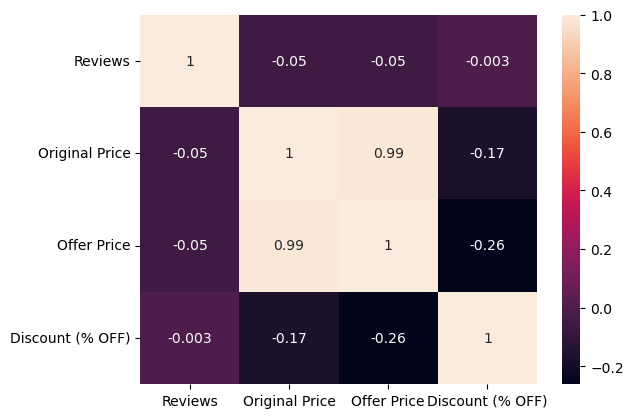

In [24]:
sns.heatmap(df.corr(), annot=True)

# DATA VISUALIZATION

In [25]:
df.columns

Index(['Product Name', 'Reviews', 'Original Price', 'Offer Price', 'Discount',
       'Free Gifts', 'Brand', 'Discount (% OFF)'],
      dtype='object')

# Factors and Insights:

LET'S FIND KEY METRICS

## Price difference

### Calculate the price difference to analyze the discount amount provided for each product.

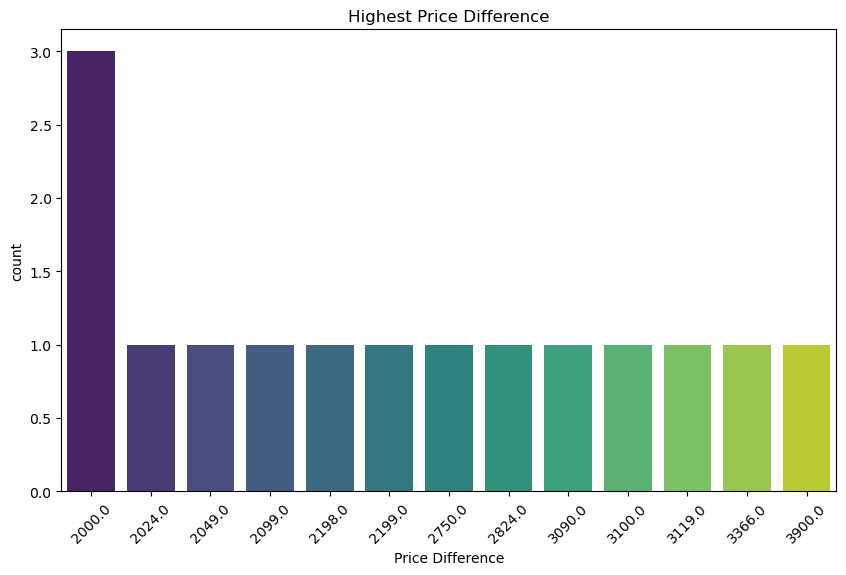

In [45]:
# Calculate the price difference
df['Price Difference'] = df['Original Price'] - df['Offer Price']



# Sort the DataFrame by Price Difference column
sorted_df = df.sort_values('Price Difference', ascending=False)



# Plot the price difference analysis using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Price Difference', data=sorted_df.head(15), palette='viridis')
plt.title('Highest Price Difference')
plt.xlabel('Price Difference')
plt.xticks(rotation=45)
plt.show()

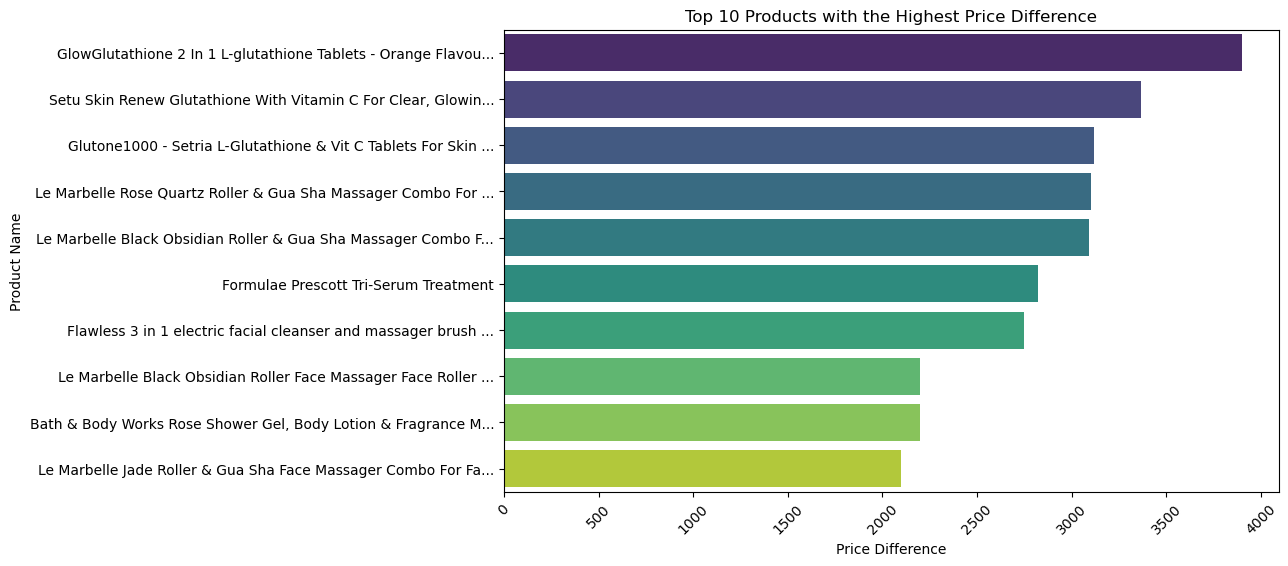

In [27]:
# Plot the price difference analysis using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Price Difference', y='Product Name', data=sorted_df.head(10), palette='viridis')
plt.title('Top 10 Products with the Highest Price Difference')
plt.ylabel('Product Name')
plt.xlabel('Price Difference')
plt.xticks(rotation=45)
plt.show()

# MOST RATED PRODUCT

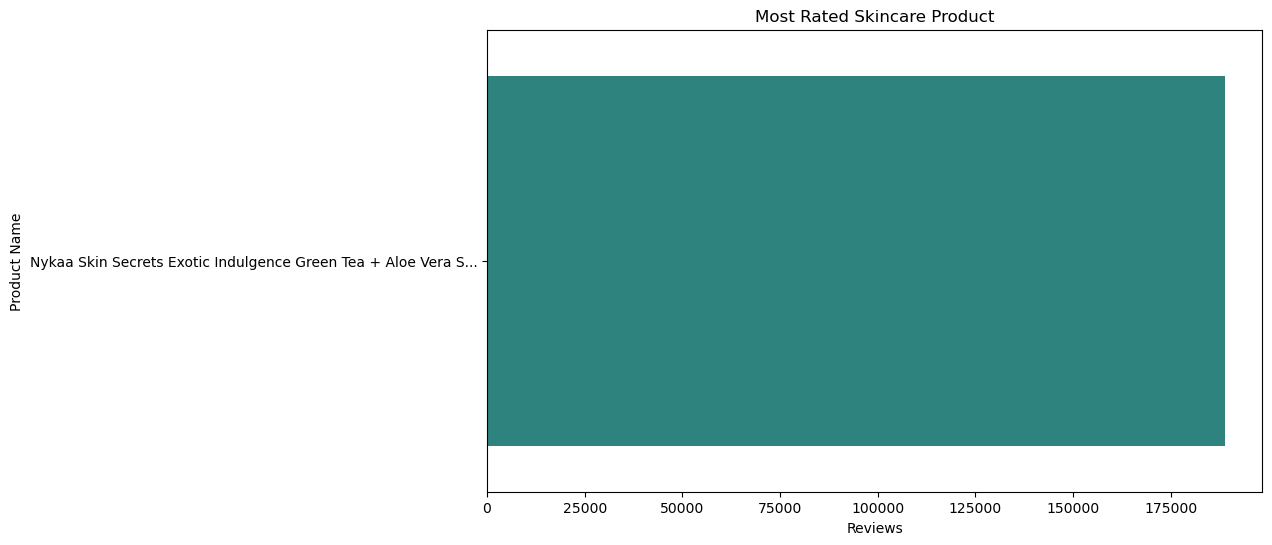

In [28]:
# Sort the DataFrame by Reviews column to get the most rated product
most_rated_product = df.sort_values('Reviews', ascending=False).iloc[0]

# Create a bar plot to visualize the most rated product
plt.figure(figsize=(10, 6))
sns.barplot(x='Reviews', y='Product Name', data=pd.DataFrame([most_rated_product]), palette='viridis')
plt.title('Most Rated Skincare Product')
plt.xlabel('Reviews')
plt.ylabel('Product Name')
plt.show()

# BRAND ANALYSIS

## Analyze the distribution of products across different brands ('Brand') to identify popular or prominent brands in the skincare category.

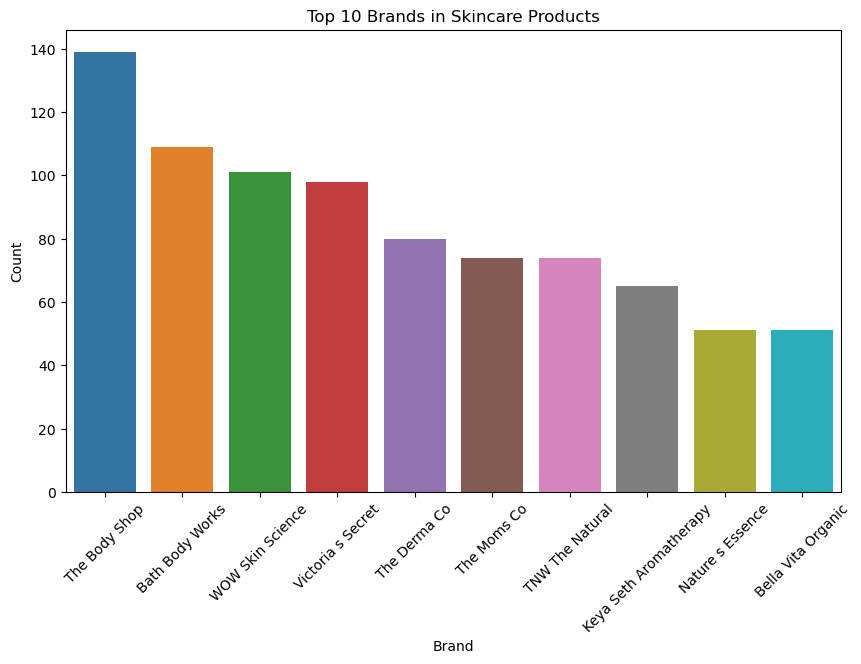

In [29]:
# Perform brand analysis
brand_counts = df['Brand'].value_counts()
top_brands = brand_counts.head(10)  # Select the top 10 brands for visualization

# Plot the brand analysis using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title('Top 10 Brands in Skincare Products')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# TOP RATED PRODUCTS
## Identify the products with the highest ratings ('Reviews') to highlight the best-performing items.

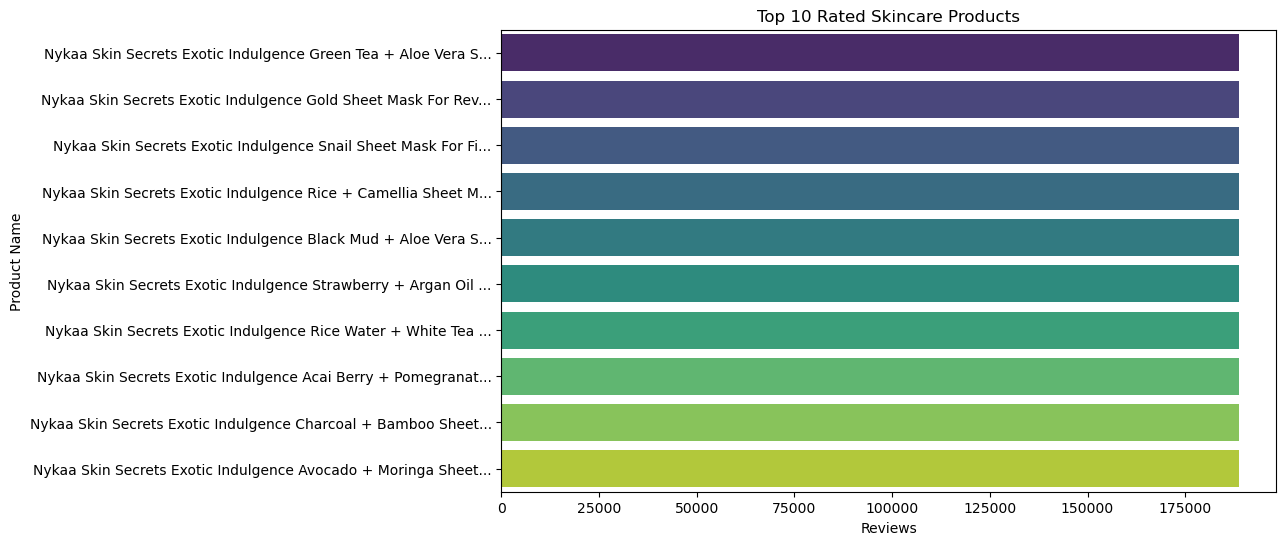

In [30]:
# Sort the DataFrame by Reviews column to get top-rated products
top_rated_products = df.sort_values('Reviews', ascending=False).head(10)

# Plot the top-rated products using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Reviews', y='Product Name', data=top_rated_products, palette='viridis')
plt.title('Top 10 Rated Skincare Products')
plt.xlabel('Reviews')
plt.ylabel('Product Name')
plt.show()

# Most discounted products
## Identify products with the highest discount percentage to understand customer preferences for discounted items

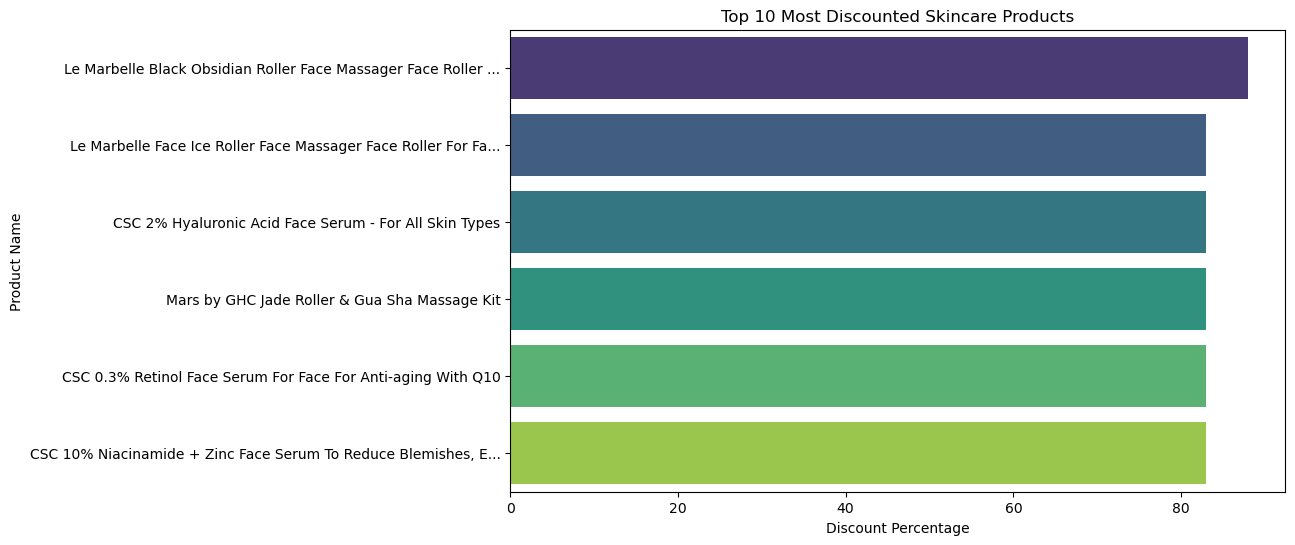

In [31]:
# Sort the DataFrame by Discount Percentage to get the most discounted products
most_discounted_products = df.sort_values('Discount (% OFF)', ascending=False).head(10)

# Plot the most discounted products using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount (% OFF)', y='Product Name', data=most_discounted_products, palette='viridis')
plt.title('Top 10 Most Discounted Skincare Products')
plt.xlabel('Discount Percentage')
plt.ylabel('Product Name')
plt.show()

# Free gifts analysis:
## Determine the most common types of free gifts offered and assess their impact on customer purchasing decisions

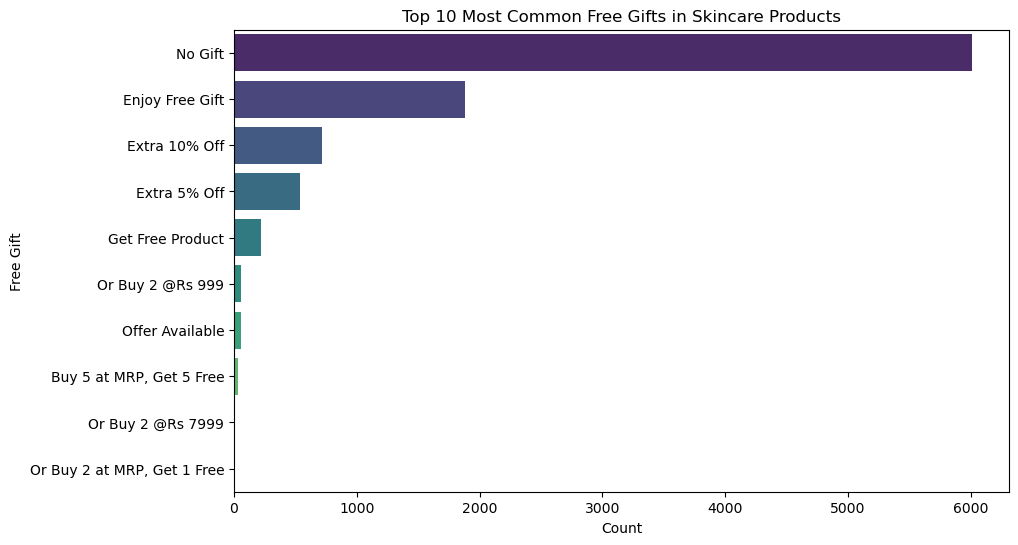

In [32]:
# Extract the unique free gifts and their frequencies
free_gift_counts = df['Free Gifts'].value_counts().reset_index()
free_gift_counts.columns = ['Free Gift', 'Count']

# Sort the free gifts by count in descending order
free_gift_counts.sort_values('Count', ascending=False, inplace=True)

# Plot the free gifts analysis using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Free Gift', data=free_gift_counts.head(10), palette='viridis')
plt.title('Top 10 Most Common Free Gifts in Skincare Products')
plt.xlabel('Count')
plt.ylabel('Free Gift')
plt.show()